Click here open and run the notebook on colab [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://github.com/kiranbeethoju/EU-CV-BottleDetector/raw/main/solution1_a.ipynb)


*   Please make sure that your runtime is using GPU




In [25]:
import torch
import glob
from IPython.display import Image, display

#Install Dependencies


In [11]:
!git clone https://github.com/kiranbeethoju/EU-CV-BottleDetector.git
%cd /content
!mv /content/EU-CV-BottleDetector/detectTheBottles /content
!pip install -r detectTheBottles/requirements.txt

fatal: destination path 'EU-CV-BottleDetector' already exists and is not an empty directory.
/content
mv: cannot stat '/content/EU-CV-BottleDetector/detectTheBottles': No such file or directory


In [12]:
!pip install cython matplotlib tqdm scipy ipython ninja yacs opencv-python ffmpeg opencv-contrib-python Pillow scikit-image scikit-learn lmfit imutils pyyaml jupyterlab==3
!pip install torch==1.7.1+cu101 torchvision==0.8.2+cu101 torchaudio==0.7.2 -f https://download.pytorch.org/whl/torch_stable.html

     |████████████████████████████████| 112kB 7.7MB/s 
     |████████████████████████████████| 307kB 12.6MB/s 
     |████████████████████████████████| 8.3MB 14.8MB/s 
     |████████████████████████████████| 61kB 9.5MB/s 
     |████████████████████████████████| 256kB 49.0MB/s 
     |████████████████████████████████| 430kB 58.4MB/s 
     |████████████████████████████████| 51kB 7.5MB/s 
     |████████████████████████████████| 245kB 53.8MB/s 
     |████████████████████████████████| 61kB 9.0MB/s 
     |████████████████████████████████| 122kB 51.0MB/s 
     |████████████████████████████████| 71kB 11.5MB/s 
  Created wheel for ffmpeg: filename=ffmpeg-1.4-cp37-none-any.whl size=6083 sha256=2d6ffd70c1f7a62e095aa270bfb9959a24cdf1c5a8dd65f039cfba8b3abbbcf3
  Stored in directory: /root/.cache/pip/wheels/b6/68/c3/a05a35f647ba871e5572b9bbfc0b95fd1c6637a2219f959e7a
  Created wheel for lmfit: filename=lmfit-1.0.2-cp37-none-any.whl size=85265 sha256=e441fd25024c77b074eff8e161b12aaac00faa132c230bae0270f

Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |████████████████████████████████| 735.4MB 25kB/s 
     |████████████████████████████████| 12.8MB 238kB/s 
     |████████████████████████████████| 7.6MB 6.9MB/s 
ERROR: torchtext 0.9.0 has requirement torch==1.8.0, but you'll have torch 1.7.1+cu101 which is incompatible.
  Found existing installation: torch 1.8.0+cu101
    Uninstalling torch-1.8.0+cu101:
      Successfully uninstalled torch-1.8.0+cu101
  Found existing installation: torchvision 0.9.0+cu101
    Uninstalling torchvision-0.9.0+cu101:
      Successfully uninstalled torchvision-0.9.0+cu101


In [13]:
%cd /content/detectTheBottles
!ls

/content/detectTheBottles
data		     hubconf.py       __pycache__	testImg.png  weights
dataset_bottles.zip  LICENSE	      README.md		test.py
detect.py	     models	      requirements.txt	train.py
Dockerfile	     new_modifiedSet  runs		utils


In [17]:
#!unzip /content/detectTheBottles/dataset_bottles.zip

Archive:  /content/detectTheBottles/dataset_bottles.zip
replace new_modifiedSet/images/train/outputimagename.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [33]:
#!sh /content/detectTheBottles/weights/download_weights.sh #download models  pwd

'/content/detectTheBottles'

This bottom cell is for training purpose (500 epochs completed in 1.430 hours)

In [ ]:
#!python train.py --batch 8 --epochs 500 --data /content/detectTheBottles/new_modifiedSet/bottle.yml --img 640 --cfg /content/detectTheBottles/models/yolov5l.yaml --weights /content/detectTheBottles/yolov5l.pt

In [ ]:
!cp runs/train/exp3/weights/best.pt /content/drive/MyDrive/EUCLID_CODING_TEST

## Pretrained best model for inference purpose 

In [20]:
!gdown --id 1g9bfIXuWvMQcs0ktFgZc34XGPu7QgMRx
!mv /content/detectTheBottles/best.pt /content/detectTheBottles/weights

Downloading...
From: https://drive.google.com/uc?id=1g9bfIXuWvMQcs0ktFgZc34XGPu7QgMRx
To: /content/detectTheBottles/best.pt
93.7MB [00:00, 298MB/s]


## Detecting all images in any directory

In [21]:
!python detect.py --weights /content/detectTheBottles/weights/best.pt --conf 0.3 --source /content/detectTheBottles/new_modifiedSet/images/val

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.3, device='', exist_ok=False, img_size=640, iou_thres=0.45, name='exp', project='runs/detect', save_conf=False, save_txt=False, source='/content/detectTheBottles/new_modifiedSet/images/val', update=False, view_img=False, weights=['/content/detectTheBottles/weights/best.pt'])
YOLOv5 🚀  torch 1.7.1+cu101 CUDA:0 (Tesla T4, 15109.75MB)

Fusing layers... 
Model Summary: 392 layers, 46605951 parameters, 0 gradients, 114.1 GFLOPS
image 1/3 /content/detectTheBottles/new_modifiedSet/images/val/12.jpg: printing detected items
12 f
printing detected items
4 d
[tensor(382., device='cuda:0'), tensor(149., device='cuda:0'), tensor(451., device='cuda:0'), tensor(375., device='cuda:0')]
[tensor(1368., device='cuda:0'), tensor(142., device='cuda:0'), tensor(1434., device='cuda:0'), tensor(387., device='cuda:0')]
[tensor(1438., device='cuda:0'), tensor(135., device='cuda:0'), tensor(1504., device='cuda:0'), tensor(385., device='cuda

## Showing predicted images

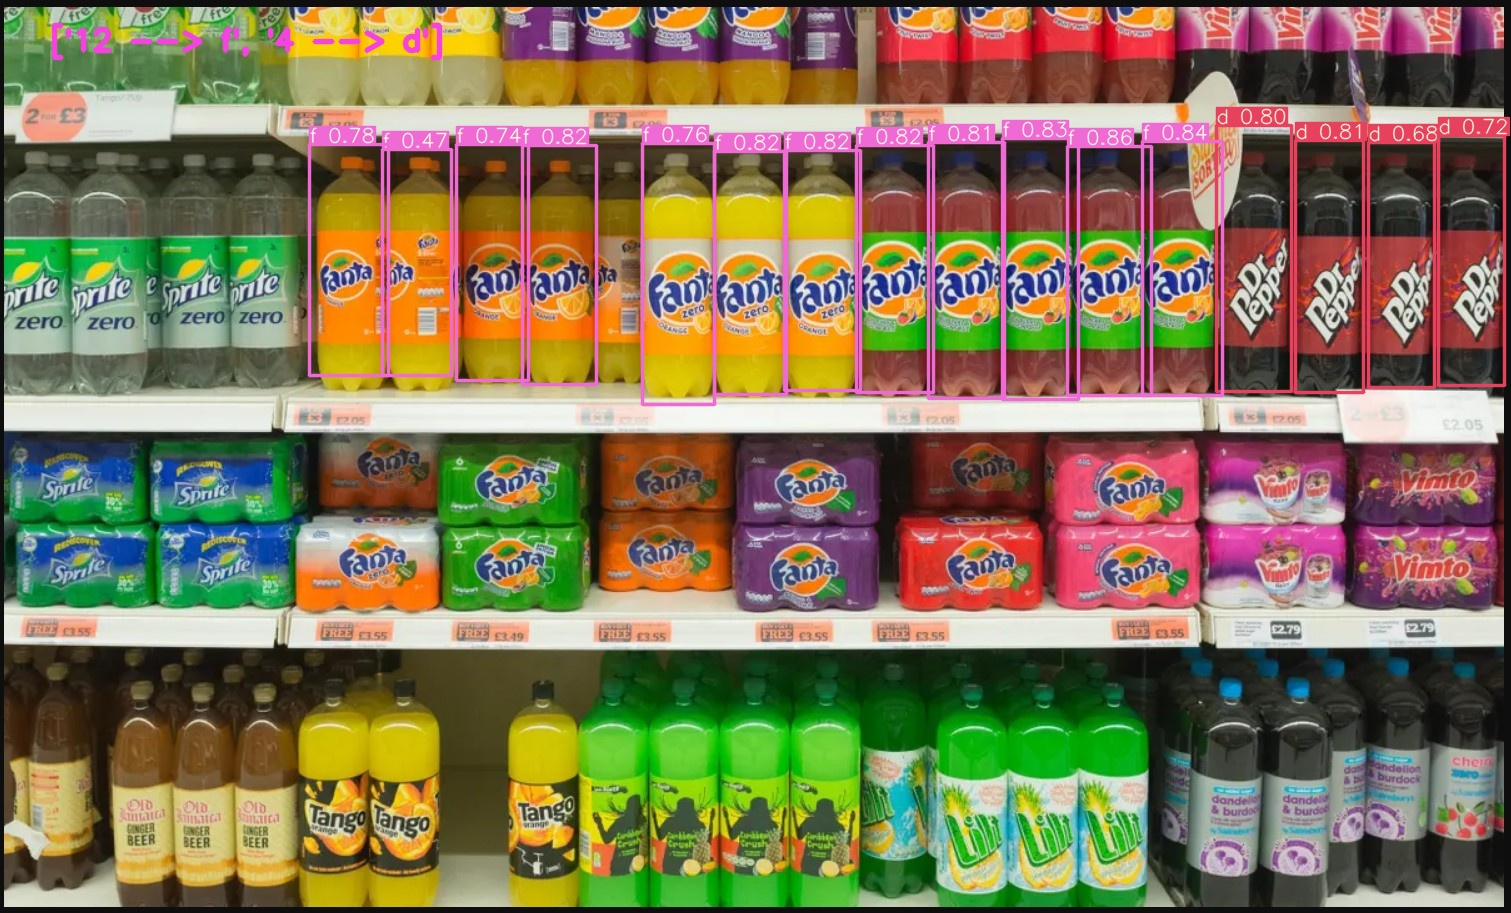

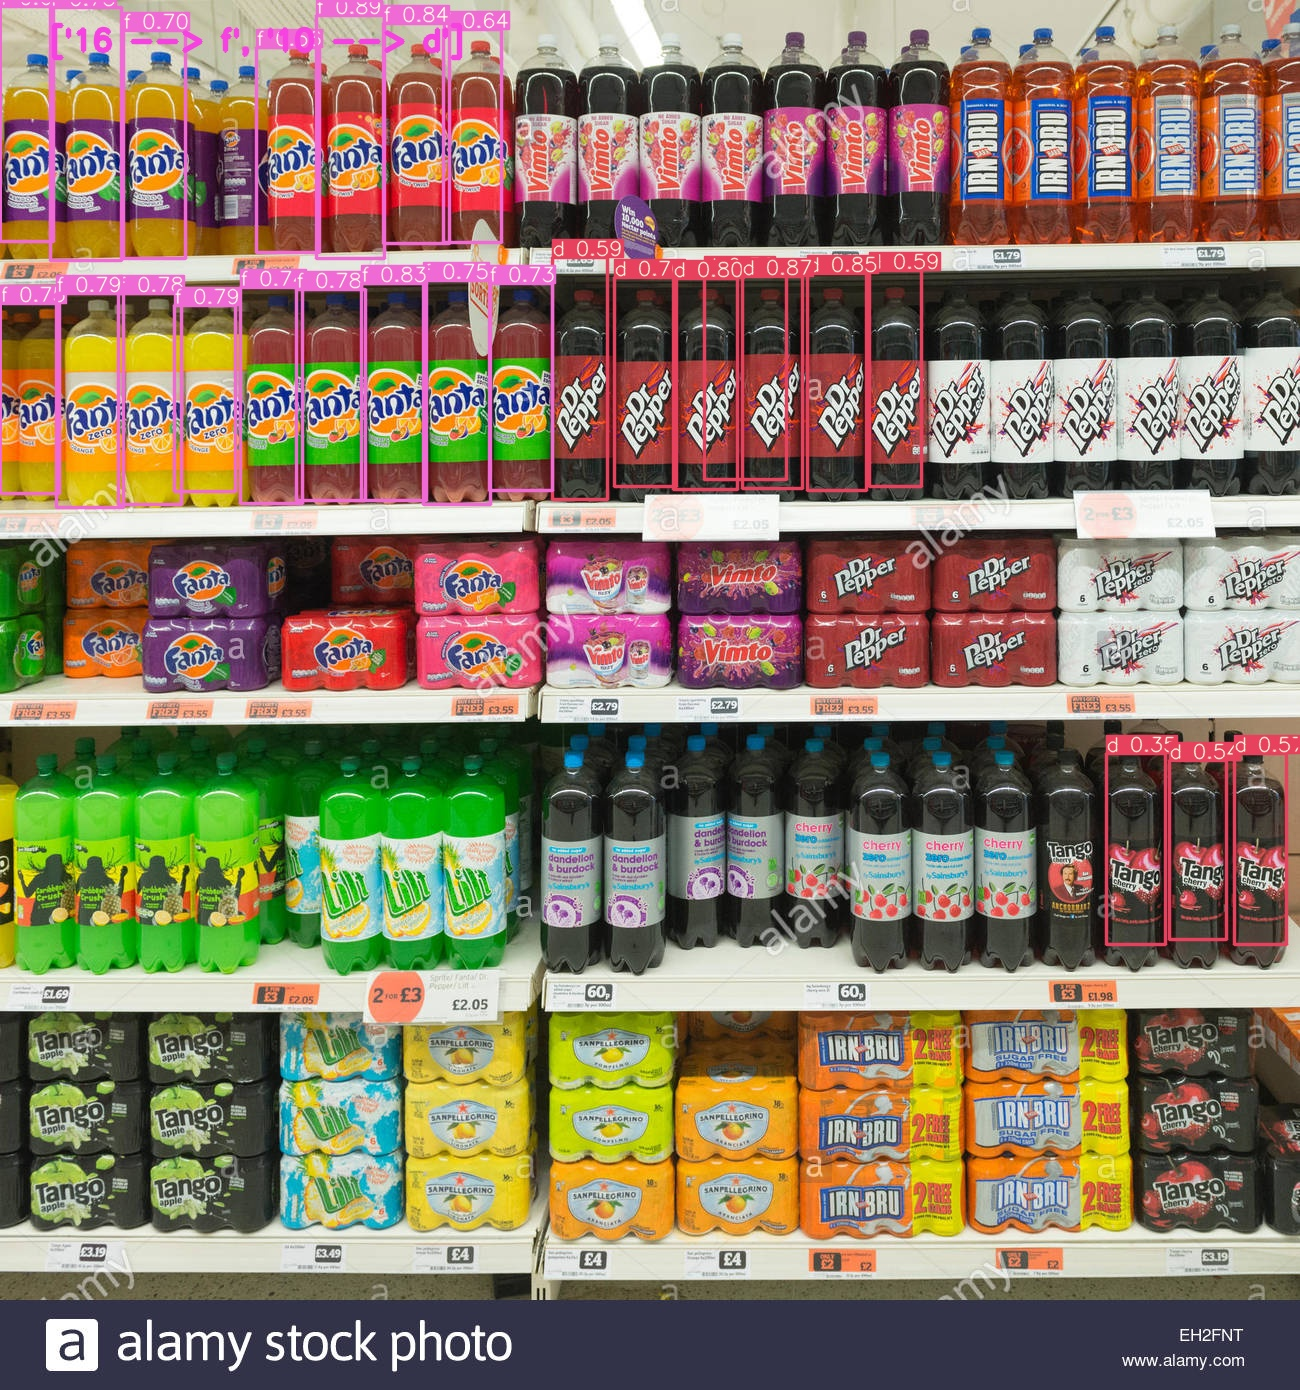

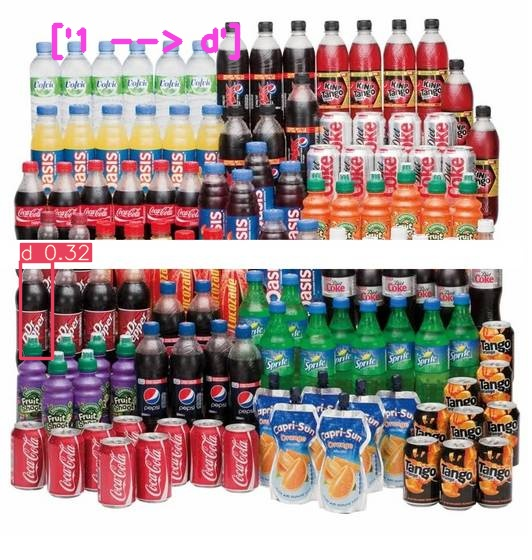

In [26]:
for imageName in glob.glob('/content/detectTheBottles/runs/detect/exp/*.jpg'): #update the directory which will be printed in above cell's last line.
    display(Image(filename=imageName))
    print("\n")